# Logistic Regression

In [8]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

import seaborn as sns

import pandas as pd

In [9]:
data = load_breast_cancer()

In [10]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [11]:
df.loc[:, 'Type'] = data.target

In [12]:
df.shape

(569, 31)

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Type'],
      dtype='object')

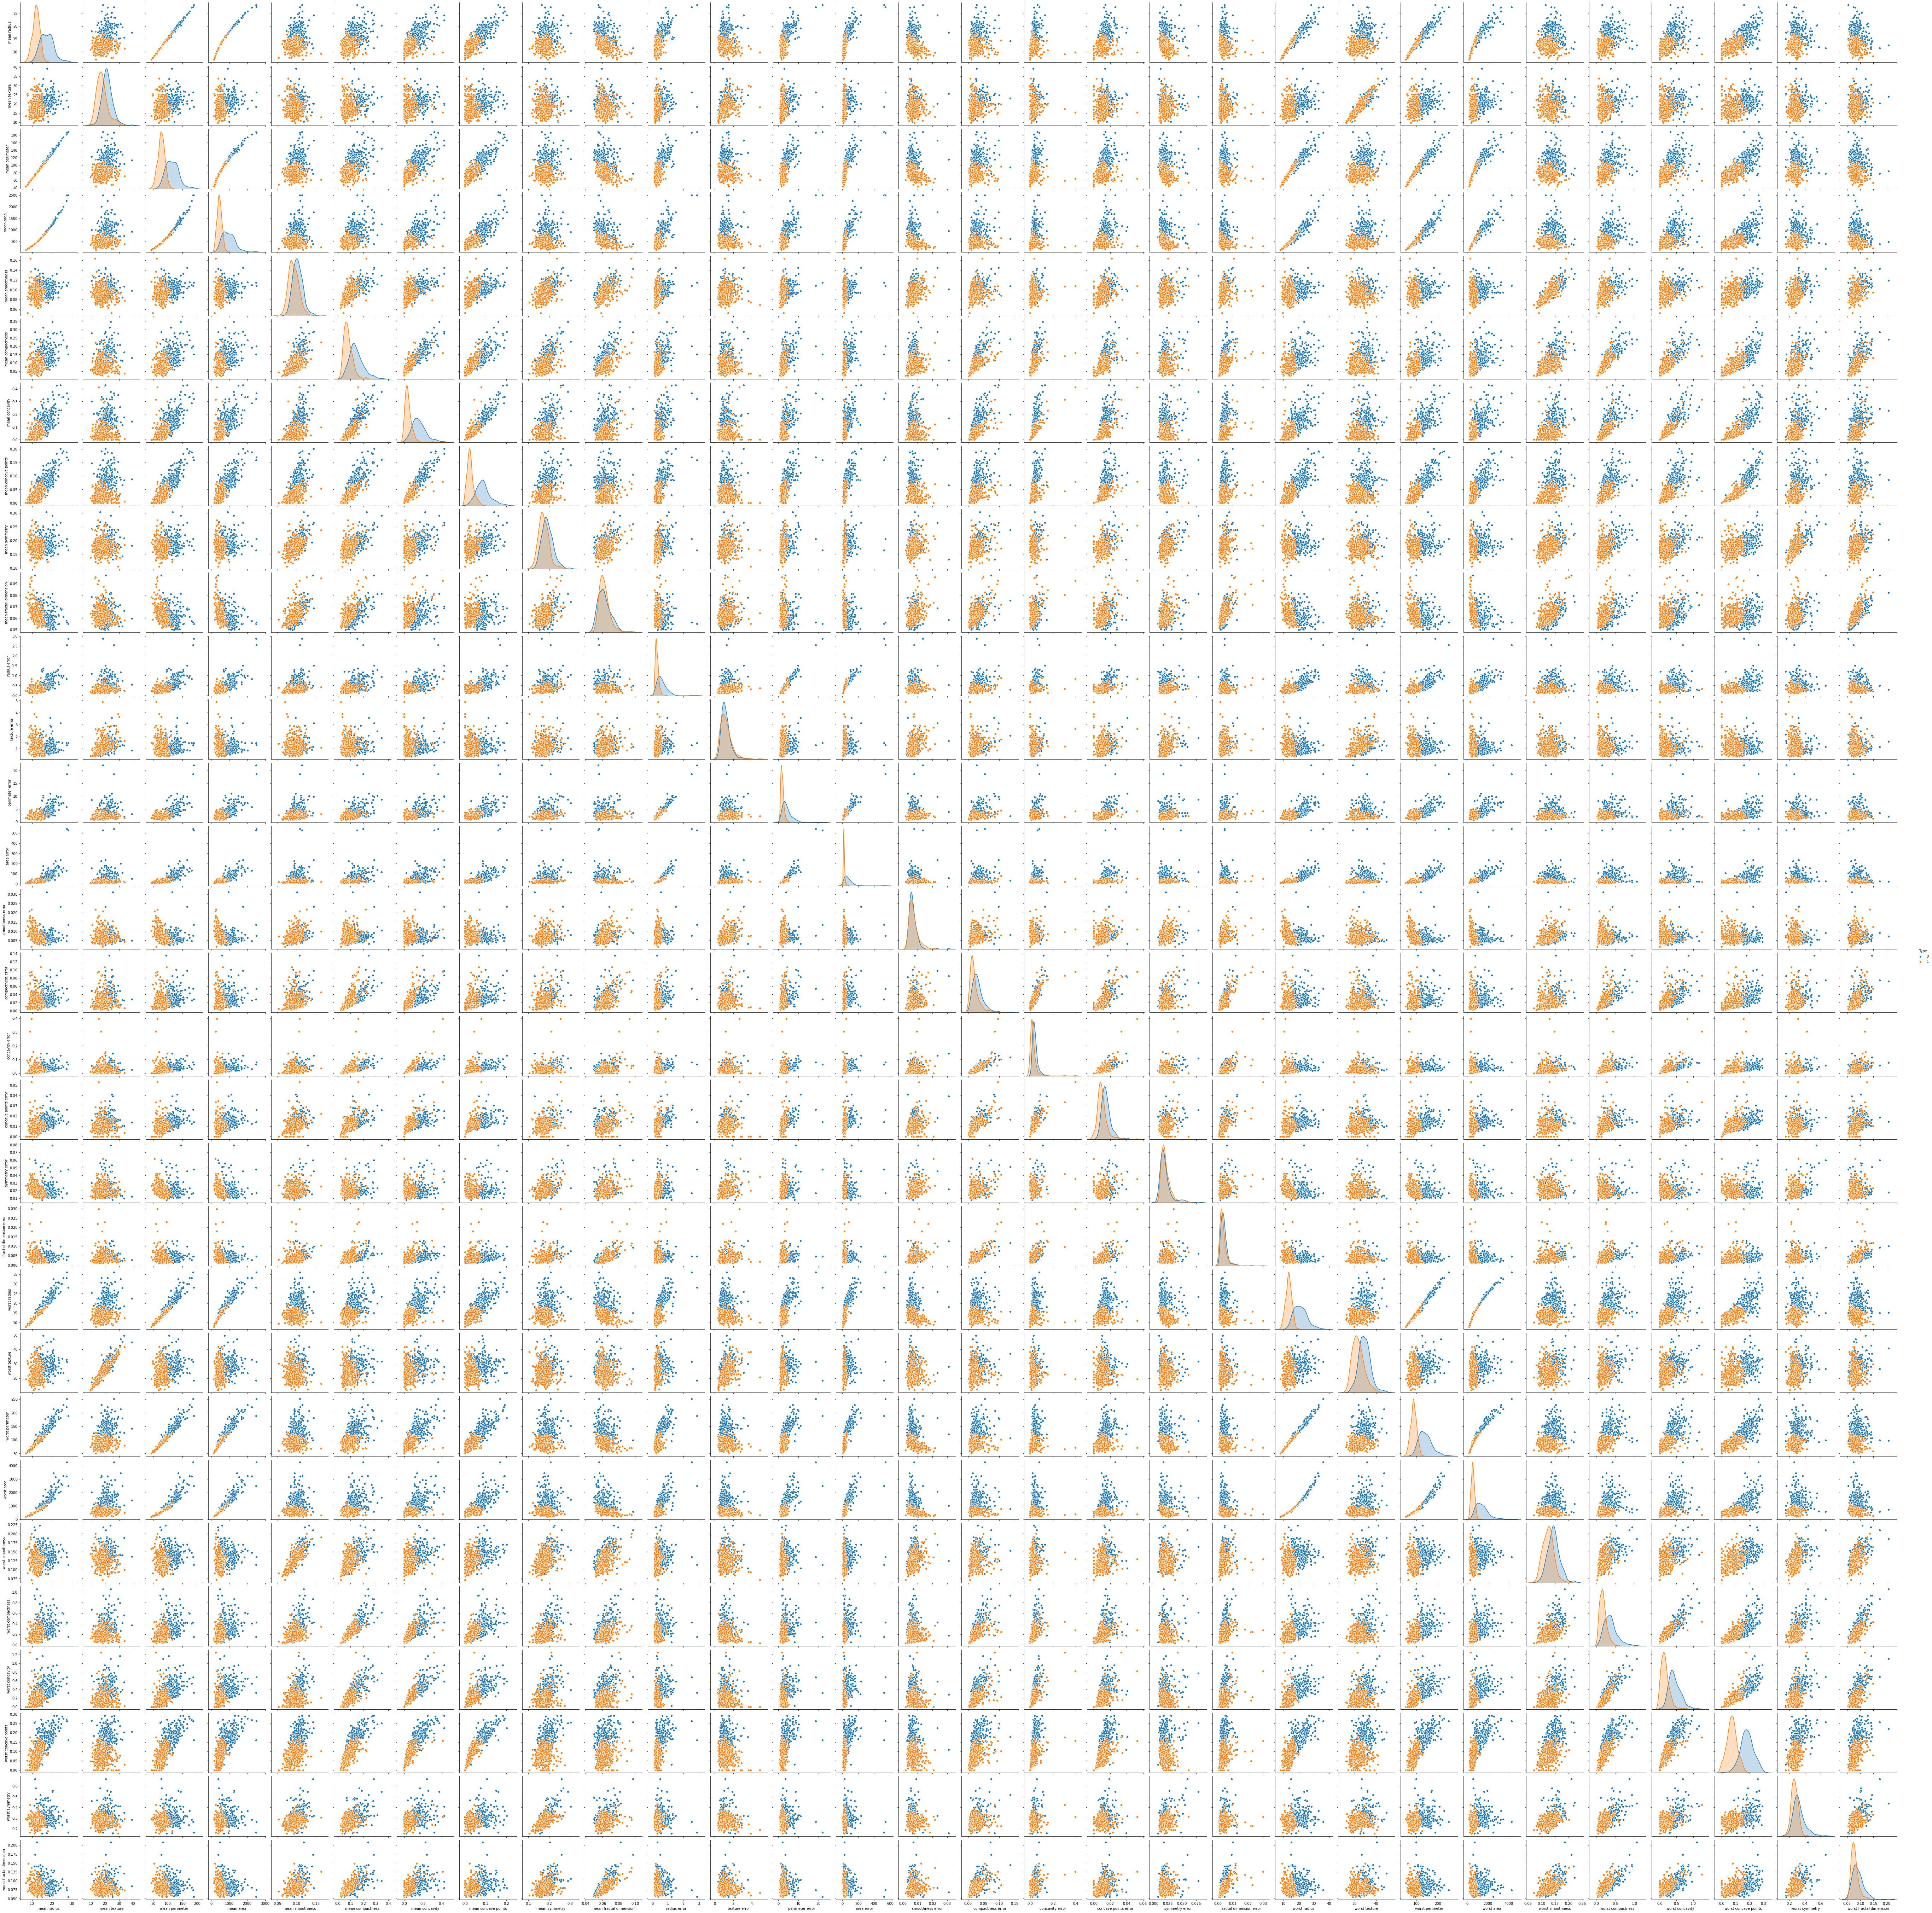

In [6]:
sns.pairplot(df, hue='Type')

In [14]:
sns.pairplot?

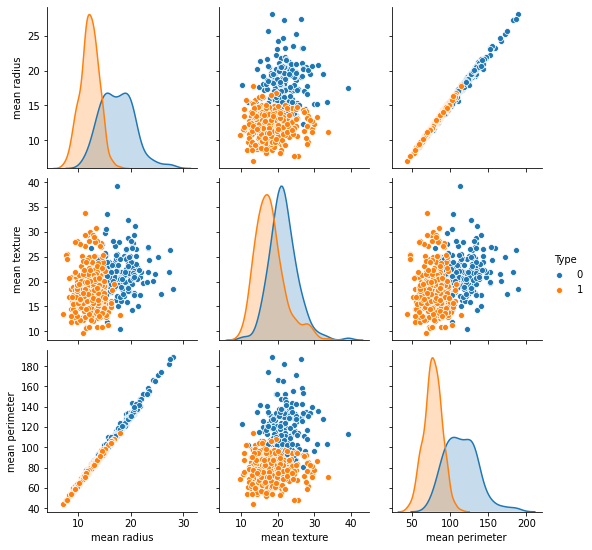

In [15]:
sns.pairplot(df, vars=['mean radius', 'mean texture', 'mean perimeter'], hue='Type')

In [16]:
from sklearn.manifold import TSNE

In [20]:
TSNE?

In [17]:
tsne = TSNE()

In [36]:
X = tsne.fit_transform(df.drop(columns=['Type']))

In [37]:
X[:5]

array([[ 17.995882  , -28.175741  ],
       [ 17.357038  , -25.339926  ],
       [ 12.393371  , -25.95569   ],
       [ -0.31814644,  17.782381  ],
       [ 11.063786  , -23.891775  ]], dtype=float32)

In [38]:
ddf = pd.DataFrame(X, columns=['TSNE1', 'TSNE2'])
ddf.loc[:, 'Type'] = df.loc[:, 'Type']

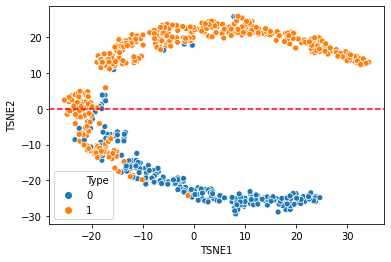

In [40]:
sns.scatterplot(x='TSNE1', y='TSNE2', data=ddf, hue='Type')

plt.axhline(0, color='red', linestyle='dashed')
#plt.axhline(-10, color='red', linestyle='dashed')

Odds ("chance") definition:

$$ r = \frac{p}{1-p} $$

Logit

$$ \log r =  \log\left(\frac{p}{1-p}\right)$$

Model as regression:

$$  \log\left(\frac{p}{1-p}\right) = f(X) $$

Therefore:

$$  p(X) = \frac{1}{1+e^{-f(X)}} $$

$f(X)$: regression function

In [41]:
def logistic(x, f = lambda x: x):
    
    return 1/(1+np.exp(-f(x)))

In [42]:
x = np.linspace(-10, 10, 100)
y = logistic(x)

[Text(0, 0.5, 'Logistic'), Text(0.5, 0, 'f(X)')]

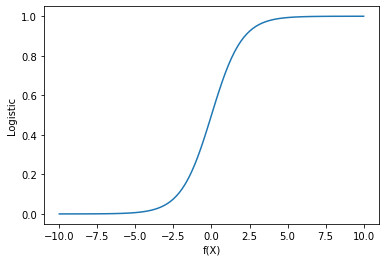

In [43]:
plt.plot(x, y)

plt.gca().set(xlabel='f(X)', ylabel='Logistic')

In [48]:
X = ddf.TSNE2.values
y = ddf.Type.values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [53]:
x0s = np.linspace(-20, 20, 1000)

probas = [logistic(X_train, lambda x: x - x0) for x0 in x0s]

In [55]:
from sklearn.metrics import roc_auc_score

In [56]:
aucs = np.array([roc_auc_score(y_train, proba) for proba in probas])

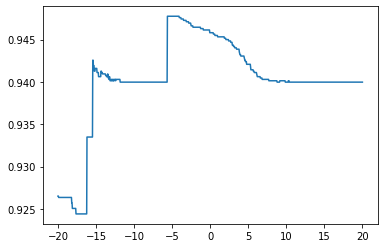

In [57]:
plt.plot(x0s, aucs)

In [67]:
auc = x0s[aucs.argmax()]

auc, aucs.max()

(-5.625625625625625, 0.9477611940298507)

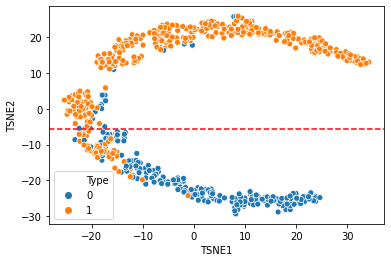

In [59]:
sns.scatterplot(x='TSNE1', y='TSNE2', data=ddf, hue='Type')

plt.axhline(auc, color='red', linestyle='dashed')

Log-loss:

$$ \mathrm{LogLoss} = -\frac{1}{N}\sum_{i=1}^N [y_i\log p_i + (1-y_i)\log(1-p_i)] $$

In [60]:
from sklearn.metrics import log_loss

In [65]:
logls = np.array([log_loss(y_train, proba, eps=1e-5) for proba in probas])

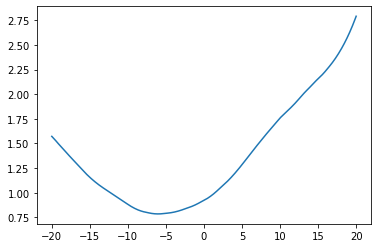

In [66]:
plt.plot(x0s, logls)

In [69]:
logls.min()

0.7855546994355912

In [74]:
logloss, auc

(-6.026026026026026, -5.625625625625625)

In [72]:
logloss = x0s[logls.argmin()]

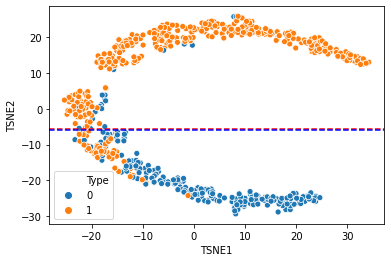

In [73]:
sns.scatterplot(x='TSNE1', y='TSNE2', data=ddf, hue='Type')

plt.axhline(auc, color='red', linestyle='dashed')
plt.axhline(logloss, color='blue', linestyle='dashed')

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
LogReg = LogisticRegression()

In [81]:
LogReg.fit(X_train.reshape(-1, 1), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
LogReg.intercept_

array([0.80144137])

In [83]:
LogReg.coef_

array([[0.14356475]])

In [ ]:
probas = [logistic(X_train, lambda x: a * x - x0) for x0 in x0s]